# Customers and Products Analysis Using SQL by Bevis Lau

This is a Guided Project from Dataquest<br>
The purpose is to study the Scale Model Cars Database with 3 main questions to answer

Question 1: Which products should we order more of or less of? <br>
Question 2: How should we tailor marketing and communication strategies to customer behaviors? <br>
Question 3: How much can we spend on acquiring new customers?

In [2]:
import sqlite3 as sql
import pandas as pd

In [3]:
!pip install ipython-sql

In [4]:
%load_ext sql

In [5]:
%sql sqlite:///stores.db

In [6]:
%%sql 
SELECT *
FROM products
LIMIT 5;

 * sqlite:///stores.db
Done.


productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front suspension, gear-shift lever, footbrake lever, drive chain, wheels and steering. All parts are particularly delicate due to their precise scale and require special care and attention.",7933,48.81,95.7
S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.,7305,98.58,214.3
S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddle bags located on side of motorcycle, detailed engine, working steering, working suspension, two leather seats, luggage rack, dual exhaust pipes, small saddle bag located on handle bars, two-tone paint with chrome accents, superior die-cast detail , rotating wheels , working kick stand, diecast metal with plastic parts and baked enamel finish.",6625,68.99,118.94
S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos and insignias, detachable rear wheelie bar, heavy diecast metal with resin parts, authentic multi-color tampo-printed graphics, separate engine drive belts, free-turning front fork, rotating tires and rear racing slick, certificate of authenticity, detailed engine, display stand\r\n, precision diecast replica, baked enamel finish, 1:10 scale model, removable fender, seat and tank cover piece for displaying the superior detail of the v-twin engine",5582,91.02,193.66
S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steering function; detailed interior; detailed engine; opening hood; opening trunk; opening doors; and detailed chassis.,3252,85.68,136


To understand database structure

In [7]:
%%sql
SELECT 'customers' table_name, count(*) number_of_attributes,(SELECT count(*)FROM customers ) number_of_rows FROM pragma_table_info('customers')
UNION ALL
SELECT 'products' table_name, count(*) number_of_attributes,(SELECT count(*)FROM products ) number_of_rows FROM pragma_table_info('products')
UNION ALL
SELECT 'productlines' table_name, count(*) number_of_attributes,(SELECT count(*)FROM productlines ) number_of_rows FROM pragma_table_info('productlines')
UNION ALL
SELECT 'orders' table_name, count(*) number_of_attributes,(SELECT count(*)FROM orders ) number_of_rows FROM pragma_table_info('orders')
UNION ALL
SELECT 'orderdetails' table_name, count(*) number_of_attributes,(SELECT count(*)FROM orderdetails ) number_of_rows FROM pragma_table_info('orderdetails')
UNION ALL
SELECT 'payments' table_name, count(*) number_of_attributes,(SELECT count(*)FROM payments ) number_of_rows FROM pragma_table_info('payments')
UNION ALL
SELECT 'employees' table_name, count(*) number_of_attributes,(SELECT count(*)FROM employees ) number_of_rows FROM pragma_table_info('employees')
UNION ALL
SELECT 'offices' table_name, count(*) number_of_attributes,(SELECT count(*)FROM offices ) number_of_rows FROM pragma_table_info('offices');



 * sqlite:///stores.db
Done.


table_name,number_of_attributes,number_of_rows
customers,13,122
products,9,110
productlines,4,7
orders,7,326
orderdetails,5,2996
payments,4,273
employees,8,23
offices,9,7


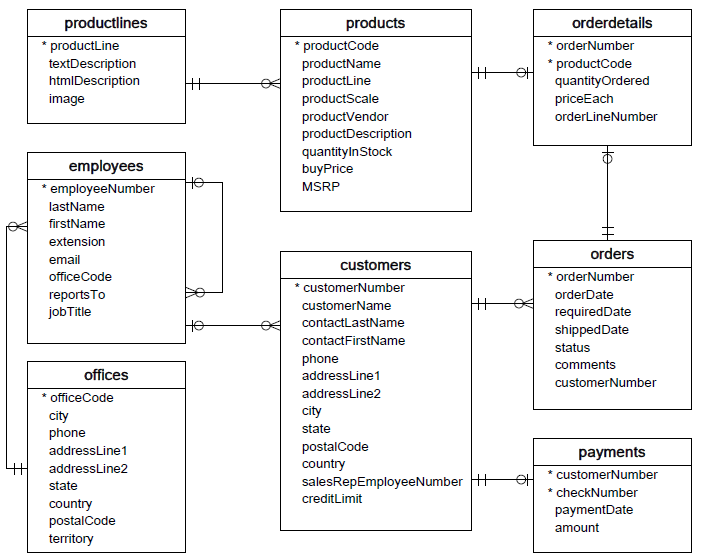

## Question 1: Which Products Should We Order More of or Less of?

Product low in stock

In [8]:
%%sql
SELECT p.productCode,p.productName,ROUND(SUM(o.quantityOrdered)/p.quantityInStock,2) AS lowstock
FROM products as p
JOIN orderdetails as o
ON p.productCode = o.productCode
GROUP BY  p.productCode
ORDER BY lowstock DESC 
LIMIT 10 ;


 * sqlite:///stores.db
Done.


productCode,productName,lowstock
S24_2000,1960 BSA Gold Star DBD34,67.0
S12_1099,1968 Ford Mustang,13.0
S32_4289,1928 Ford Phaeton Deluxe,7.0
S32_1374,1997 BMW F650 ST,5.0
S72_3212,Pont Yacht,2.0
S700_3167,F/A 18 Hornet 1/72,1.0
S700_1938,The Mayflower,1.0
S50_4713,2002 Yamaha YZR M1,1.0
S32_3522,1996 Peterbilt 379 Stake Bed with Outrigger,1.0
S18_2795,1928 Mercedes-Benz SSK,1.0


Product sales performance are above average

In [9]:
%%sql
SELECT p.productCode,ROUND(SUM(o.quantityOrdered*o.priceEach),2) AS total_revenue
FROM products as p
JOIN orderdetails as o
ON p.productCode = o.productCode
GROUP BY p.productCode
ORDER BY total_revenue DESC
LIMIT 10


 * sqlite:///stores.db
Done.


productCode,total_revenue
S18_3232,276839.98
S12_1108,190755.86
S10_1949,190017.96
S10_4698,170686.0
S12_1099,161531.48
S12_3891,152543.02
S18_1662,144959.91
S18_2238,142530.63
S18_1749,140535.6
S12_2823,135767.03


Combine the two with CTE expressions 

In [10]:
%%sql
With low_stock_table AS
(SELECT p.productCode,p.productName,ROUND(SUM(o.quantityOrdered)/p.quantityInStock,2) AS lowstock
FROM products as p
JOIN orderdetails as o
ON p.productCode = o.productCode
GROUP BY  p.productCode
ORDER BY lowstock DESC 
LIMIT 10 )

SELECT p.productCode,p.productName,ROUND(SUM(o.quantityOrdered*o.priceEach),2) AS total_revenue, ls.lowstock
FROM products as p
JOIN orderdetails as o
ON p.productCode = o.productCode
JOIN low_stock_table AS ls
ON ls.productCode = p.productCode
GROUP BY p.productCode
ORDER BY ls.lowstock DESC,total_revenue DESC
LIMIT 10


 * sqlite:///stores.db
Done.


productCode,productName,total_revenue,lowstock
S24_2000,1960 BSA Gold Star DBD34,67193.49,67.0
S12_1099,1968 Ford Mustang,161531.48,13.0
S32_4289,1928 Ford Phaeton Deluxe,60493.33,7.0
S32_1374,1997 BMW F650 ST,89364.89,5.0
S72_3212,Pont Yacht,47550.4,2.0
S18_2795,1928 Mercedes-Benz SSK,132275.98,1.0
S700_3167,F/A 18 Hornet 1/72,76618.4,1.0
S50_4713,2002 Yamaha YZR M1,73670.64,1.0
S700_1938,The Mayflower,69531.61,1.0
S32_3522,1996 Peterbilt 379 Stake Bed with Outrigger,57282.49,1.0


## Insight

-S24_2000 AND S24_2000 are the two top products that face low in stock issues, and particularly S12_1099, it shall act on reordering soon becaues of its high total revenue across the top 10 low stock products

## Question 2: How Should We Match Marketing and Communication Strategies to Customer Behavior? 
The question down to looking for VIP and the profit generatted.

Top 30 VIP

In [13]:
%%sql
SELECT o.customerNumber, ROUND(SUM(od.quantityOrdered* (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON o.orderNumber = od.orderNumber
JOIN products p ON od.productCode = p.productCode
GROUP BY customerNumber 
ORDER BY profit DESC
LIMIT 30;


 * sqlite:///stores.db
Done.


customerNumber,profit
141,326519.66
124,236769.39
151,72370.09
114,70311.07
119,60875.3
148,60477.38
187,60095.86
323,60013.99
131,58669.1
450,55931.37


Then find out about their actual contact information

In [14]:
%%sql
WITH top_30_VIP AS (
SELECT o.customerNumber, ROUND(SUM(od.quantityOrdered* (od.priceEach - p.buyPrice)),2) AS profit
FROM orders o
JOIN orderdetails od ON o.orderNumber = od.orderNumber
JOIN products p ON od.productCode = p.productCode
GROUP BY customerNumber 
ORDER BY profit DESC
LIMIT 30)
SELECT  c.customerNumber,c.customerName,c.contactFirstName,c.contactLastName,c.phone,c.country,t3.profit
FROM customers c 
JOIN top_30_vip t3
ON c.customerNumber = t3.customerNumber
ORDER BY t3.profit DESC
LIMIT 10 ;

 * sqlite:///stores.db
Done.


customerNumber,customerName,contactFirstName,contactLastName,phone,country,profit
141,Euro+ Shopping Channel,Diego,Freyre,(91) 555 94 44,Spain,326519.66
124,Mini Gifts Distributors Ltd.,Susan,Nelson,4155551450,USA,236769.39
151,Muscle Machine Inc,Jeff,Young,2125557413,USA,72370.09
114,"Australian Collectors, Co.",Peter,Ferguson,03 9520 4555,Australia,70311.07
119,La Rochelle Gifts,Janine,Labrune,40.67.8555,France,60875.3
148,"Dragon Souveniers, Ltd.",Eric,Natividad,+65 221 7555,Singapore,60477.38
187,"AV Stores, Co.",Rachel,Ashworth,(171) 555-1555,UK,60095.86
323,"Down Under Souveniers, Inc",Mike,Graham,+64 9 312 5555,New Zealand,60013.99
131,Land of Toys Inc.,Kwai,Lee,2125557818,USA,58669.1
450,The Sharp Gifts Warehouse,Sue,Frick,4085553659,USA,55931.37


Insight
-There are two major players from Spain and USA that contribute much more profit (total of 55k) than the rest of the 10 customers.

## Question 3: How Much Can We Spend on Acquiring New Customers?
From the sample query, it seems there are decline in new customers and hence new acqusition strategies is needed

In [7]:
%%sql

With customer_profit AS (
SELECT o.customerNumber,round(SUM((od.priceEach-p.buyPrice)*od.quantityOrdered),2) as profit
FROM orderdetails od
JOIN products p
ON p.productCode = od.productCode
JOIN orders o
ON od.orderNumber = o.orderNumber
GROUP BY o.customerNumber
ORDER BY profit DESC )

SELECT avg(cp.profit)
FROM customer_profit cp




 * sqlite:///stores.db
Done.


avg(cp.profit)
39039.5943877551


Insight 
-Average profit from a new cusotmer is around 39039
-The cost per lead , assuming 30% of profit is used to acquire new customer, it would be 39039 x 30% = 11711